# Experiment Results and Analysis

Experiment Parameters:
- Model: Decision Tree Classifier
- Full Dataset shape:  (284807, 30)
- Training Set shape:  (182276, 29)
- Test Set shape:  (102531, 29)

Machine Parameters
- Architecture:          x86_64
- CPU op-mode(s):        32-bit, 64-bit
- Byte Order:            Little Endian
- CPU(s):                24
- On-line CPU(s) list:   0-23
- Thread(s) per core:    2
- Core(s) per socket:    6
- Socket(s):             2
- NUMA node(s):          2
- Vendor ID:             GenuineIntel
- CPU family:            6
- Model:                 63
- Model name:            Intel(R) Xeon(R) CPU E5-2620 v3 @ 2.40GHz
- Stepping:              2
- CPU MHz:               2352.392
- CPU max MHz:           3200.0000
- CPU min MHz:           1200.0000
- BogoMIPS:              4799.90
- Virtualization:        VT-x
- L1d cache:             32K
- L1i cache:             32K
- L2 cache:              256K
- L3 cache:              15360K
- NUMA node0 CPU(s):     0-5,12-17
- NUMA node1 CPU(s):     6-11,18-23

- 131013808 K total memory
-      4481692 K used memory
-       6018192 K active memory
-      91681664 K inactive memory
-      28305168 K free memory
-        667232 K buffer memory
-      97559712 K swap cache
-      12582908 K total swap
-         39816 K used swap
-      12543092 K free swap
-     110186303 non-nice user cpu ticks
-           597 nice user cpu ticks
-      38216232 system cpu ticks
-    4387002730 idle cpu ticks
-     474460115 IO-wait cpu ticks
-             0 IRQ cpu ticks
-        861614 softirq cpu ticks
-             0 stolen cpu ticks
-   37521761744 pages paged in
-   14726274978 pages paged out
-         28321 pages swapped in
-         87849 pages swapped out
-    2277706671 interrupts
-    1100988497 CPU context switches
-    1578322931 boot time
-    479267929 forks
 



## Imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style='whitegrid')

## Load Data

In [9]:
d = {
    'Runtime' : [6.136,6.208,6.159,5.633,6.333,6.065,6.063,5.663,6.421,6.855,
                 5.547,5.952,6.183,6.011,6.880,6.060,5.703,5.462,5.170,5.608,
                 5.967,5.718,6.089,5.532,5.249,6.552,5.428,5.567,5.991,5.788,
                 6.269,6.699,5.902,5.387,5.902,5.543,6.136,5.819,6.076,5.605,
                 8.879,7.128,7.416,8.850,5.587,5.930,6.948,6.414,6.550,6.246,
                 4.888,8.398,4.911,5.030,4.950,5.078,5.102,5.255,4.984,5.034,
                 4.932,5.114,5.021,4.840,5.183,4.890,5.084,5.043,4.812,4.872,
                 5.091,4.910,4.915,4.935,5.105,5.086,4.895,5.168,5.077,5.147,
                 5.330,5.333,5.403,5.064,4.889,6.046,5.133,4.922,5.004,5.140,
                 5.096,4.885,4.862,5.257,5.596,5.029,5.308,5.039,5.279,5.111],
    'N': [1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,
          5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,
          10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,
          50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,
          100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,
          1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,
          5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,
          10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,
          50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,
          100000,100000,100000,100000,100000,100000,100000,100000,100000,100000],
    'Method': ['Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only',
               'Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only',
               'Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only',
               'Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only',
               'Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only','Notebook Only',
               'Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF',
               'Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF',
               'Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF',
               'Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF',
               'Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF','Python UDF']
}


In [10]:
data = pd.DataFrame(data=d)

## Visualizations

For each batch size, N, we plot a histogram of the runtimes and overlay the set's corresponding normal distribution.

Orange = Python UDF

Blue = Notebook Only

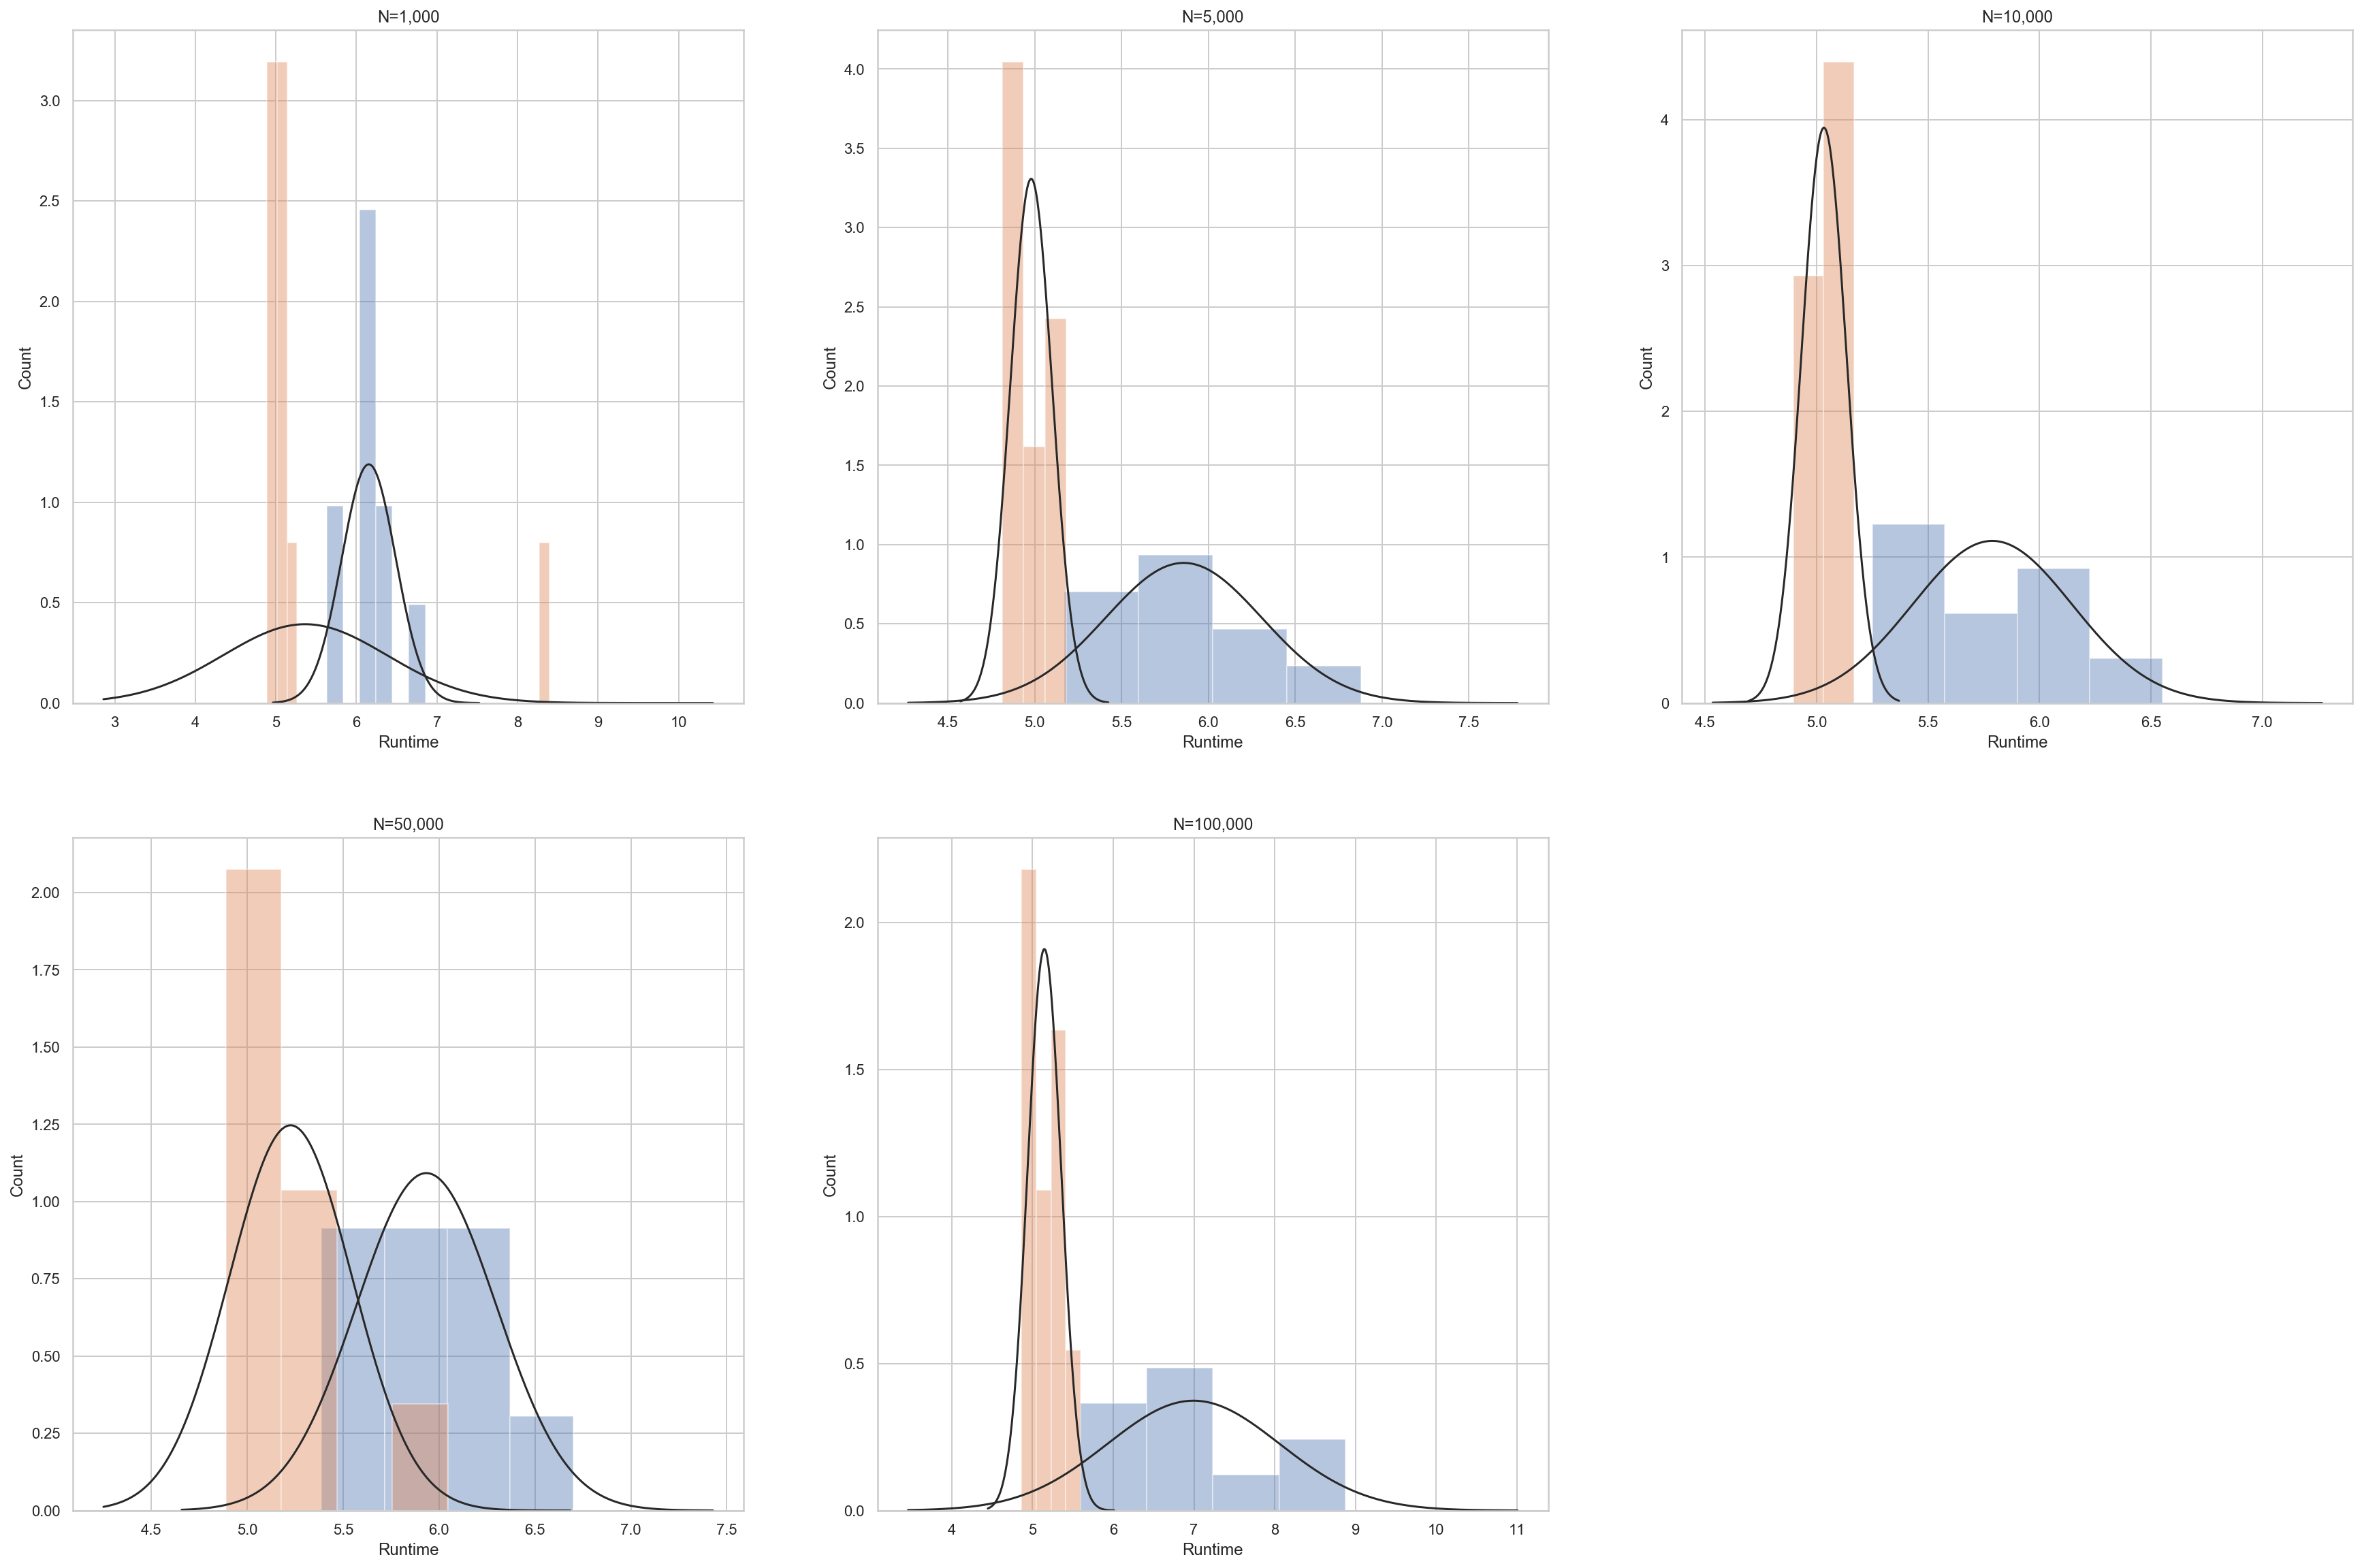

In [21]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

sns.distplot(data[(data['N']==1000) & (data['Method']=='Notebook Only')]['Runtime'], fit=norm, kde=False, ax=axes[0,0], label='Notebook Only')
sns.distplot(data[(data['N']==1000) & (data['Method']=='Python UDF')]['Runtime'], fit=norm, kde=False, ax=axes[0,0], label='Python UDF Only')
axes[0,0].set_title('N=1,000')
axes[0,0].set_ylabel('Count')

sns.distplot(data[(data['N']==5000) & (data['Method']=='Notebook Only')]['Runtime'], fit=norm,kde=False, ax=axes[0,1])
sns.distplot(data[(data['N']==5000) & (data['Method']=='Python UDF')]['Runtime'], fit=norm,kde=False, ax=axes[0,1])
axes[0,1].set_title('N=5,000')
axes[0,1].set_ylabel('Count')

sns.distplot(data[(data['N']==10000) & (data['Method']=='Notebook Only')]['Runtime'], fit=norm,kde=False,ax=axes[0,2])
sns.distplot(data[(data['N']==10000) & (data['Method']=='Python UDF')]['Runtime'], fit=norm,kde=False, ax=axes[0,2])
axes[0,2].set_title('N=10,000')
axes[0,2].set_ylabel('Count')

sns.distplot(data[(data['N']==50000) & (data['Method']=='Notebook Only')]['Runtime'],fit=norm,kde=False, ax=axes[1,0])
sns.distplot(data[(data['N']==50000) & (data['Method']=='Python UDF')]['Runtime'], fit=norm,kde=False, ax=axes[1,0])
axes[1,0].set_title('N=50,000')
axes[1,0].set_ylabel('Count')

sns.distplot(data[(data['N']==100000) & (data['Method']=='Notebook Only')]['Runtime'],fit=norm,kde=False, ax=axes[1,1])
sns.distplot(data[(data['N']==100000) & (data['Method']=='Python UDF')]['Runtime'], fit=norm,kde=False, ax=axes[1,1])
axes[1,1].set_title('N=100,000')
axes[1,1].set_ylabel('Count')

axes[-1,-1].axis('off');

Here we plot the Average Runtime vs. Batch Size. The error bars correspond to the standard deviation of the set's normal distribution

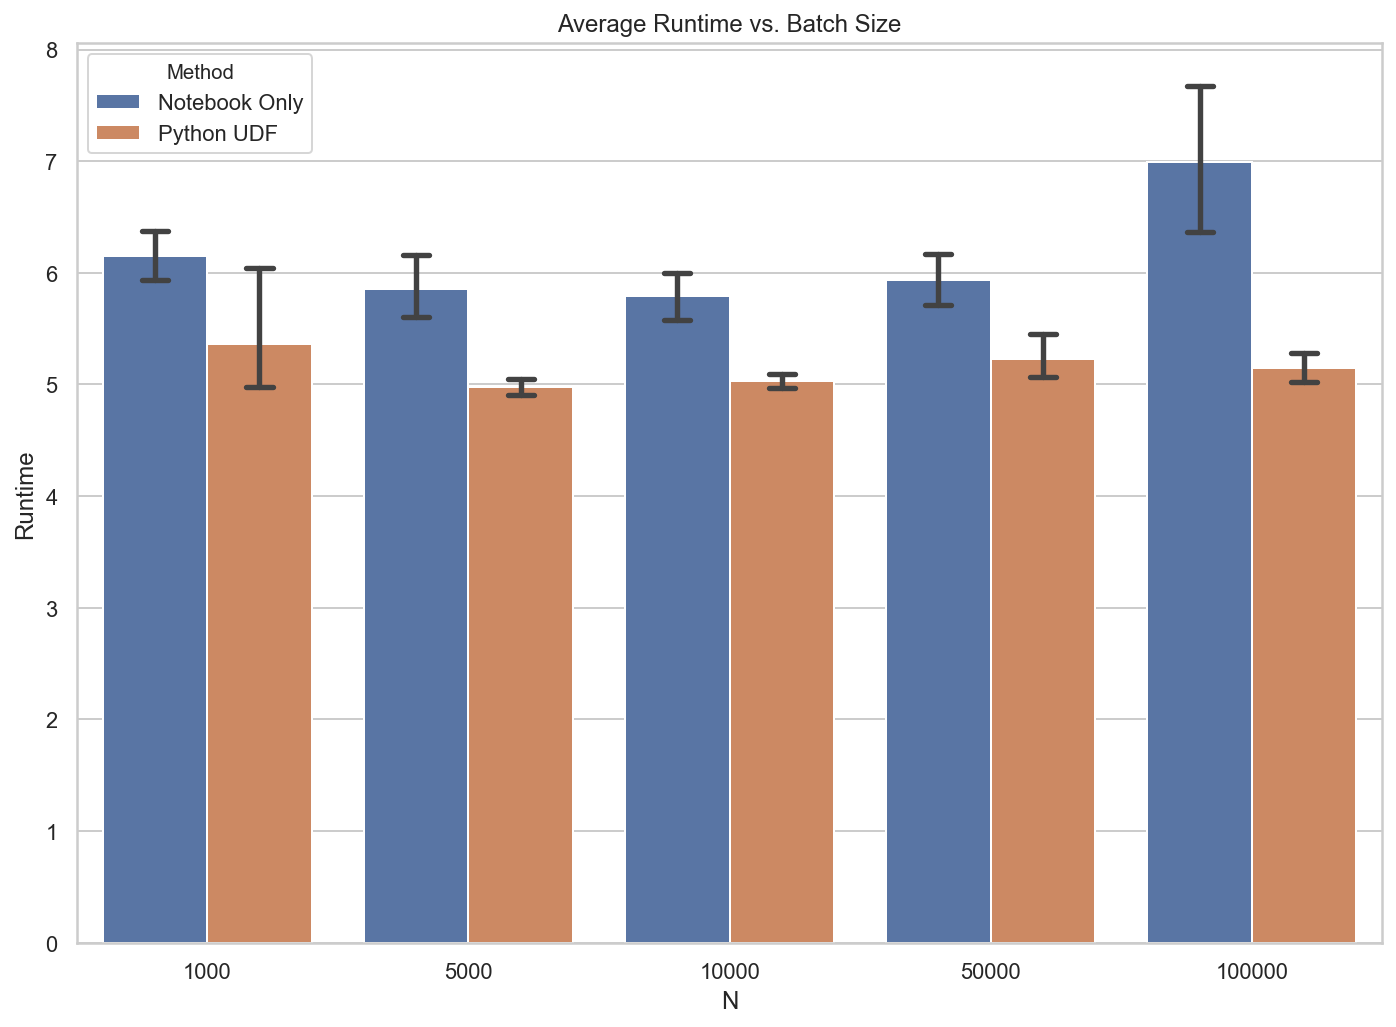

In [13]:
sns.barplot(x='N',y='Runtime',hue='Method',data=data,capsize=0.1)
plt.title('Average Runtime vs. Batch Size');

## Key Takeaways

We note the following:
- The notebook only method is sensitive to the size of the test set
- The runtime of the Python UDF method is largely unaffected by the batch size
- Python UDFs perform better (i.e. predict faster) than the Notebook Only method. On average they result in a 19% decrease in runtime